In [88]:
%load_ext autoreload
%autoreload 2

import sys 
import os
sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/')

from openfermion.transforms import jordan_wigner
from src.pools import SD, GSD, GSD1, SingletGSD, SpinCompGSD, PauliPool,  NoZPauliPool1, NoZPauliPool, QE, QE1, QE_All, CEO, OVP_CEO, DVG_CEO, DVE_CEO, MVP_CEO
from src.molecules import create_h2

# Molecule
R = 0.742
molecule = create_h2(R)
molecule.description

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'H2'

### Single and Double Excitations

In [11]:
sd_pool = SD(molecule)
sd_pool.__dict__

for i in range(len(sd_pool.operators)):
    print(f'\nOperator-{i}: {sd_pool.operators[i]._f_operator}')
    # print(f'\nOperator-{i}: {type(sd_pool.operators[i]._f_operator)}')


Operator-0: 0.5 [0^ 2] +
-0.5 [2^ 0]

Operator-1: 0.5 [1^ 3] +
-0.5 [3^ 1]

Operator-2: 0.5 [1^ 0^ 3 2] +
-0.5 [3^ 2^ 1 0]


### Generalized Single and Double Excitations
where repeated indices are not allowed

In [89]:
gsd_pool = GSD(molecule)
gsd_pool.__dict__


for i in range(len(gsd_pool.operators)):
    print(f'Fermionic Operator-{i}: {gsd_pool.operators[i]._f_operator}')
print('')

for i in range(len(gsd_pool.operators)):
    qubit_operator = jordan_wigner(gsd_pool.operators[i]._f_operator)
    print(f'Qubit Operator-{i}: {qubit_operator}')

Fermionic Operator-0: 0.5 [0^ 1] +
-0.5 [1^ 0]
Fermionic Operator-1: -0.25 [1^ 0^ 2 1] +
0.25 [1^ 0^ 3 0] +
0.25 [2^ 1^ 1 0] +
-0.25 [3^ 0^ 1 0]
Fermionic Operator-2: 0.5 [1^ 0^ 3 2] +
-0.5 [3^ 2^ 1 0]
Fermionic Operator-3: -0.25 [2^ 1^ 3 2] +
0.25 [3^ 0^ 3 2] +
0.25 [3^ 2^ 2 1] +
-0.25 [3^ 2^ 3 0]

Qubit Operator-0: 0.25j [X0 Y1] +
-0.25j [Y0 X1]
Qubit Operator-1: -0.0625j [X0 Z1 Y2] +
0.0625j [X0 Y2] +
0.0625j [Y0 Z1 X2] +
-0.0625j [Y0 X2] +
0.0625j [Z0 X1 Z2 Y3] +
-0.0625j [Z0 Y1 Z2 X3] +
-0.0625j [X1 Z2 Y3] +
0.0625j [Y1 Z2 X3]
Qubit Operator-2: -0.0625j [X0 X1 X2 Y3] +
-0.0625j [X0 X1 Y2 X3] +
0.0625j [X0 Y1 X2 X3] +
-0.0625j [X0 Y1 Y2 Y3] +
0.0625j [Y0 X1 X2 X3] +
-0.0625j [Y0 X1 Y2 Y3] +
0.0625j [Y0 Y1 X2 Y3] +
0.0625j [Y0 Y1 Y2 X3]
Qubit Operator-3: -0.0625j [X0 Z1 Y2] +
0.0625j [X0 Z1 Y2 Z3] +
0.0625j [Y0 Z1 X2] +
-0.0625j [Y0 Z1 X2 Z3] +
-0.0625j [X1 Z2 Y3] +
0.0625j [X1 Y3] +
0.0625j [Y1 Z2 X3] +
-0.0625j [Y1 X3]


### Generalized Single and Double Excitations
where repeated indices are allowed

In [ ]:
gsd_pool = GSD1(molecule)
gsd_pool.__dict__


for i in range(len(gsd_pool.operators)):
    print(f'Fermionic Operator-{i}: {gsd_pool.operators[i]._f_operator}')
print('')

for i in range(len(gsd_pool.operators)):
    qubit_operator = jordan_wigner(gsd_pool.operators[i]._f_operator)
    print(f'Qubit Operator-{i}: {qubit_operator}')

Fermionic Operator-0: 0.5 [0^ 2] +
-0.5 [2^ 0]
Fermionic Operator-1: 0.5 [1^ 3] +
-0.5 [3^ 1]
Fermionic Operator-2: 0.5 [1^ 0^ 3 0] +
-0.5 [3^ 0^ 1 0]
Fermionic Operator-3: -0.5 [1^ 0^ 2 1] +
0.5 [2^ 1^ 1 0]
Fermionic Operator-4: 0.5 [1^ 0^ 3 2] +
-0.5 [3^ 2^ 1 0]
Fermionic Operator-5: 0.5 [2^ 1^ 3 0] +
-0.5 [3^ 0^ 2 1]
Fermionic Operator-6: 0.5 [3^ 0^ 3 2] +
-0.5 [3^ 2^ 3 0]
Fermionic Operator-7: 0.5 [2^ 1^ 3 2] +
-0.5 [3^ 2^ 2 1]

Qubit Operator-0: 0.25j [X0 Z1 Y2] +
-0.25j [Y0 Z1 X2]
Qubit Operator-1: 0.25j [X1 Z2 Y3] +
-0.25j [Y1 Z2 X3]
Qubit Operator-2: 0.125j [Z0 X1 Z2 Y3] +
-0.125j [Z0 Y1 Z2 X3] +
-0.125j [X1 Z2 Y3] +
0.125j [Y1 Z2 X3]
Qubit Operator-3: -0.125j [X0 Z1 Y2] +
0.125j [X0 Y2] +
0.125j [Y0 Z1 X2] +
-0.125j [Y0 X2]
Qubit Operator-4: -0.0625j [X0 X1 X2 Y3] +
-0.0625j [X0 X1 Y2 X3] +
0.0625j [X0 Y1 X2 X3] +
-0.0625j [X0 Y1 Y2 Y3] +
0.0625j [Y0 X1 X2 X3] +
-0.0625j [Y0 X1 Y2 Y3] +
0.0625j [Y0 Y1 X2 Y3] +
0.0625j [Y0 Y1 Y2 X3]
Qubit Operator-5: -0.0625j [X0 X1 X2 Y3] +
0.

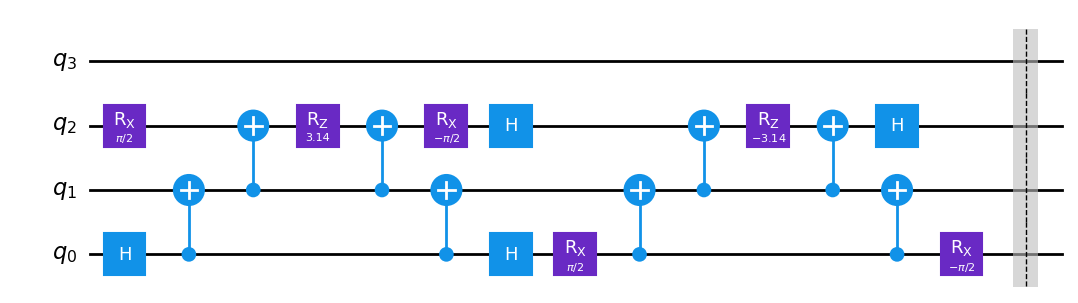

In [75]:
circuit = gsd_pool.get_circuit([1],[3.14])
circuit.draw()

### Singlet or Spin-adapted Generalized Single and Double Excitations

In [82]:
singlet_gsd_pool = SingletGSD(molecule)
singlet_gsd_pool.__dict__


for i in range(len(gsd_pool.operators)):
    print(f'Fermionic Operator-{i}: {gsd_pool.operators[i]._f_operator}')
print('')

for i in range(len(gsd_pool.operators)):
    qubit_operator = jordan_wigner(gsd_pool.operators[i]._f_operator)
    print(f'Qubit Operator-{i}: {qubit_operator}')

Fermionic Operator-0: 0.5 [0^ 2] +
-0.5 [2^ 0]
Fermionic Operator-1: 0.5 [1^ 3] +
-0.5 [3^ 1]
Fermionic Operator-2: 0.5 [1^ 0^ 3 0] +
-0.5 [3^ 0^ 1 0]
Fermionic Operator-3: -0.5 [1^ 0^ 2 1] +
0.5 [2^ 1^ 1 0]
Fermionic Operator-4: 0.5 [1^ 0^ 3 2] +
-0.5 [3^ 2^ 1 0]
Fermionic Operator-5: 0.5 [2^ 1^ 3 0] +
-0.5 [3^ 0^ 2 1]
Fermionic Operator-6: 0.5 [3^ 0^ 3 2] +
-0.5 [3^ 2^ 3 0]
Fermionic Operator-7: 0.5 [2^ 1^ 3 2] +
-0.5 [3^ 2^ 2 1]

Qubit Operator-0: 0.25j [X0 Z1 Y2] +
-0.25j [Y0 Z1 X2]
Qubit Operator-1: 0.25j [X1 Z2 Y3] +
-0.25j [Y1 Z2 X3]
Qubit Operator-2: 0.125j [Z0 X1 Z2 Y3] +
-0.125j [Z0 Y1 Z2 X3] +
-0.125j [X1 Z2 Y3] +
0.125j [Y1 Z2 X3]
Qubit Operator-3: -0.125j [X0 Z1 Y2] +
0.125j [X0 Y2] +
0.125j [Y0 Z1 X2] +
-0.125j [Y0 X2]
Qubit Operator-4: -0.0625j [X0 X1 X2 Y3] +
-0.0625j [X0 X1 Y2 X3] +
0.0625j [X0 Y1 X2 X3] +
-0.0625j [X0 Y1 Y2 Y3] +
0.0625j [Y0 X1 X2 X3] +
-0.0625j [Y0 X1 Y2 Y3] +
0.0625j [Y0 Y1 X2 Y3] +
0.0625j [Y0 Y1 Y2 X3]
Qubit Operator-5: -0.0625j [X0 X1 X2 Y3] +
0.

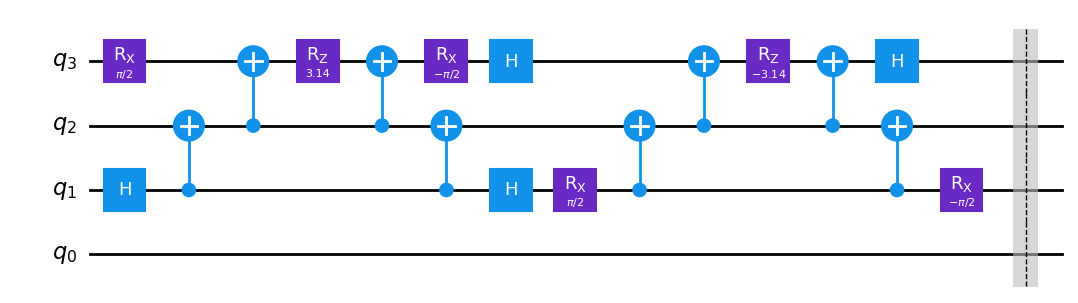

In [85]:
circuit = gsd_pool.get_circuit([0],[3.14])
circuit.draw()

### Spin-complemented Generalized Single and Double Excitations

In [21]:
spincomp_gsd_pool = SpinCompGSD(molecule)
spincomp_gsd_pool.__dict__


for i in range(len(spincomp_gsd_pool.operators)):
    print(f'\nOperator-{i}: {spincomp_gsd_pool.operators[i]._f_operator}')
    # print(f'\nOperator-{i}: {type(spincomp_gsd_pool.operators[i]._f_operator)}')


Operator-0: 0.25 [0^ 2] +
0.25 [1^ 3] +
-0.25 [2^ 0] +
-0.25 [3^ 1]

Operator-1: -0.25 [1^ 0^ 2 1] +
0.25 [1^ 0^ 3 0] +
0.25 [2^ 1^ 1 0] +
-0.25 [3^ 0^ 1 0]

Operator-2: 0.5 [1^ 0^ 3 2] +
-0.5 [3^ 2^ 1 0]

Operator-3: -0.25 [2^ 1^ 3 2] +
0.25 [3^ 0^ 3 2] +
0.25 [3^ 2^ 2 1] +
-0.25 [3^ 2^ 3 0]


### Pauli Pool

In [26]:
pauli_pool = PauliPool(molecule)
pauli_pool.__dict__


for i in range(len(pauli_pool.operators)):
    print(f'\nOperator-{i}: {pauli_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(pauli_pool.operators[i]._f_operator)}')


Operator-0: 1j [Y0 Z1 X2]

Operator-1: 1j [X0 Z1 Y2]

Operator-2: 1j [Y1 Z2 X3]

Operator-3: 1j [X1 Z2 Y3]

Operator-4: 1j [Z0 Y1 Z2 X3]

Operator-5: 1j [Z0 X1 Z2 Y3]

Operator-6: 1j [Y0 X2]

Operator-7: 1j [X0 Y2]

Operator-8: 1j [X0 X1 Y2 X3]

Operator-9: 1j [Y0 Y1 Y2 X3]

Operator-10: 1j [Y0 X1 X2 X3]

Operator-11: 1j [X0 Y1 X2 X3]

Operator-12: 1j [Y0 X1 Y2 Y3]

Operator-13: 1j [X0 Y1 Y2 Y3]

Operator-14: 1j [X0 X1 X2 Y3]

Operator-15: 1j [Y0 Y1 X2 Y3]

Operator-16: 1j [Y0 Z1 X2 Z3]

Operator-17: 1j [X0 Z1 Y2 Z3]

Operator-18: 1j [Y1 X3]

Operator-19: 1j [X1 Y3]


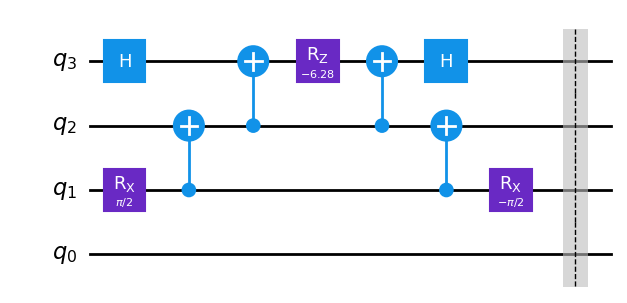

In [86]:
circuit = pauli_pool.get_circuit([1],[3.14])
circuit.draw()

### Qubit Pool (NoZPauliPool1)

In [28]:
qubit_pool = NoZPauliPool1(molecule)
qubit_pool.__dict__


for i in range(len(qubit_pool.operators)):
    print(f'\nOperator-{i}: {qubit_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(qubit_pool.operators[i]._f_operator)}')


Operator-0: 1j [Y0 X2]

Operator-1: 1j [X0 Y2]

Operator-2: 1j [Y1 X3]

Operator-3: 1j [X1 Y3]

Operator-4: 1j [X0 X1 Y2 X3]

Operator-5: 1j [Y0 Y1 Y2 X3]

Operator-6: 1j [Y0 X1 X2 X3]

Operator-7: 1j [X0 Y1 X2 X3]

Operator-8: 1j [Y0 X1 Y2 Y3]

Operator-9: 1j [X0 Y1 Y2 Y3]

Operator-10: 1j [X0 X1 X2 Y3]

Operator-11: 1j [Y0 Y1 X2 Y3]


### Qubit Pool (NoZPauliPool)

In [30]:
qubit_pool = NoZPauliPool(molecule)
qubit_pool.__dict__


for i in range(len(qubit_pool.operators)):
    print(f'\nOperator-{i}: {qubit_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(qubit_pool.operators[i]._f_operator)}')


Operator-0: 1j [Y0 X2]

Operator-1: 1j [X0 Y2]

Operator-2: 1j [Y1 X3]

Operator-3: 1j [X1 Y3]

Operator-4: 1j [Y0 X1 X2 X3]

Operator-5: 1j [X0 Y1 X2 X3]

Operator-6: 1j [X0 X1 Y2 X3]

Operator-7: 1j [X0 X1 X2 Y3]

Operator-8: 1j [X0 Y1 Y2 Y3]

Operator-9: 1j [Y0 X1 Y2 Y3]

Operator-10: 1j [Y0 Y1 X2 Y3]

Operator-11: 1j [Y0 Y1 Y2 X3]


In [ ]:
circuit = gsd_pool.get_circuit([1],[3.14])
circuit.draw()

### Qubit-Excitation Pool

In [95]:
qe_pool = QE1(molecule)
qe_pool.__dict__


for i in range(len(qe_pool.operators)):
    print(f'\nOperator-{i}: {qe_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(qe_pool.operators[i]._f_operator)}')


q_op: 0.5j [X0 Y1] +
-0.5j [Y0 X1]
term -0.5j [Y0 X1]
new pauli: -0.5j [Y0]
new pauli: -0.5j [Y0 X1]
term 0.5j [X0 Y1]
new pauli: 0.5j [X0]
new pauli: 0.5j [X0 Y1]
new operator: 0.5j [X0 Y1] +
-0.5j [Y0 X1]

q_op: -0.125j [X0 Z1 Y2] +
0.125j [X0 Y2] +
0.125j [Y0 Z1 X2] +
-0.125j [Y0 X2] +
0.125j [Z0 X1 Z2 Y3] +
-0.125j [Z0 Y1 Z2 X3] +
-0.125j [X1 Z2 Y3] +
0.125j [Y1 Z2 X3]
term 0.125j [Y1 Z2 X3]
new pauli: 0.125j [Y1]
new pauli: 0.125j [Y1 X3]
term -0.125j [Z0 Y1 Z2 X3]
new pauli: -0.125j [Y1]
new pauli: -0.125j [Y1 X3]
term -0.125j [X1 Z2 Y3]
new pauli: -0.125j [X1]
new pauli: -0.125j [X1 Y3]
term 0.125j [Z0 X1 Z2 Y3]
new pauli: 0.125j [X1]
new pauli: 0.125j [X1 Y3]
term 0.125j [Y0 Z1 X2]
new pauli: 0.125j [Y0]
new pauli: 0.125j [Y0 X2]
term -0.125j [Y0 X2]
new pauli: -0.125j [Y0]
new pauli: -0.125j [Y0 X2]
term -0.125j [X0 Z1 Y2]
new pauli: -0.125j [X0]
new pauli: -0.125j [X0 Y2]
term 0.125j [X0 Y2]
new pauli: 0.125j [X0]
new pauli: 0.125j [X0 Y2]
new operator: 0

q_op: -0.125j [X0 

In [97]:
qe_pool = QE(molecule)
qe_pool.__dict__


for i in range(len(qe_pool.operators)):
    print(f'\nOperator-{i}: {qe_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(qe_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-3: -0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]


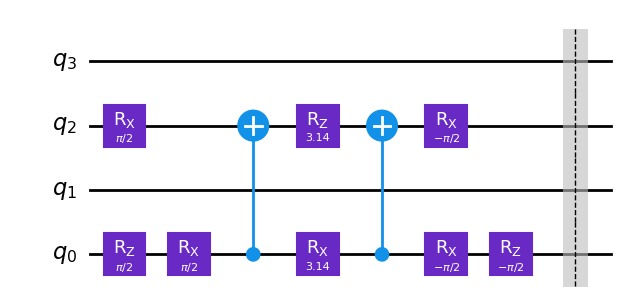

In [98]:
circuit = qe_pool.get_circuit([1],[3.14])
circuit.draw()

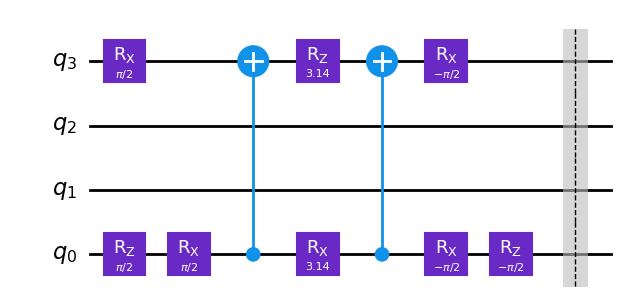

In [111]:
circuit = qe_pool.get_circuit([2],[3.14])
circuit.draw()

In [99]:
qe_pool = QE_All(molecule)
qe_pool.__dict__


for i in range(len(qe_pool.operators)):
    print(f'\nOperator-{i}: {qe_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(qe_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y1] +
-0.5j [Y0 X1]

Operator-1: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-2: 0.5j [X0 Y3] +
-0.5j [Y0 X3]

Operator-3: 0.5j [X1 Y2] +
-0.5j [Y1 X2]

Operator-4: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-5: 0.5j [X2 Y3] +
-0.5j [Y2 X3]

Operator-6: 0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
-0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
-0.125j [Y0 Y1 Y2 X3]

Operator-7: 0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
-0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
-0.125j [Y0 Y1 Y2 X3]

Operator-8: 0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
-0.125j [Y0 Y1 Y2 X3]


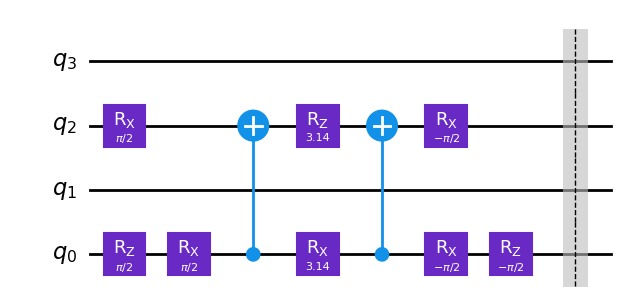

In [101]:
circuit = qe_pool.get_circuit([4],[3.14])
circuit.draw()

### Coupled Exchange Operator (CEO) Pool

In [102]:
ceo_pool = CEO(molecule)
ceo_pool.__dict__


for i in range(len(ceo_pool.operators)):
    print(f'\nOperator-{i}: {ceo_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(ceo_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.25j [X0 X1 X2 Y3] +
0.25j [X0 Y1 X2 X3] +
-0.25j [Y0 X1 Y2 Y3] +
0.25j [Y0 Y1 Y2 X3]

Operator-3: -0.25j [X0 X1 Y2 X3] +
-0.25j [X0 Y1 Y2 Y3] +
0.25j [Y0 X1 X2 X3] +
0.25j [Y0 Y1 X2 Y3]


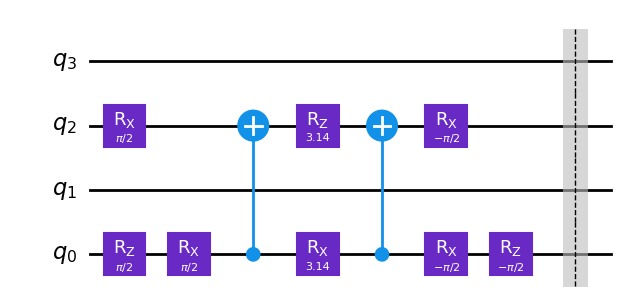

In [104]:
circuit = ceo_pool.get_circuit([1],[3.14])
circuit.draw()

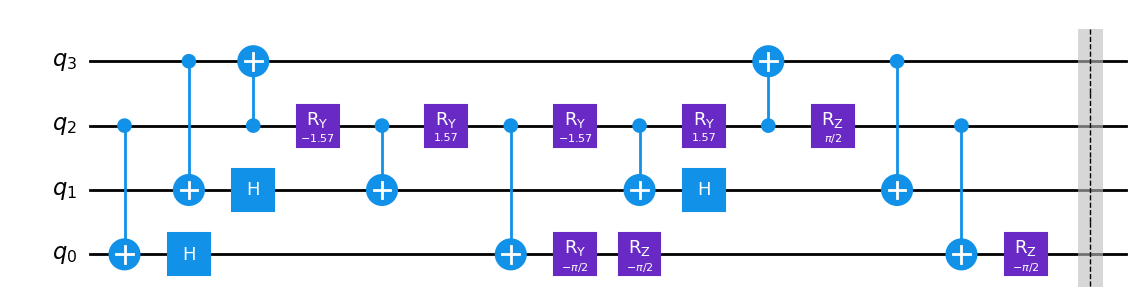

In [109]:
circuit = ceo_pool.get_circuit([2],[3.14])
circuit.draw()

### OVP CEO Pool

In [47]:
ceo_pool = OVP_CEO(molecule)
ceo_pool.__dict__


for i in range(len(ceo_pool.operators)):
    print(f'\nOperator-{i}: {ceo_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(ceo_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.25j [X0 X1 X2 Y3] +
0.25j [X0 Y1 X2 X3] +
-0.25j [Y0 X1 Y2 Y3] +
0.25j [Y0 Y1 Y2 X3]

Operator-3: -0.25j [X0 X1 Y2 X3] +
-0.25j [X0 Y1 Y2 Y3] +
0.25j [Y0 X1 X2 X3] +
0.25j [Y0 Y1 X2 Y3]


In [112]:
mvp_ceo_pool = MVP_CEO(molecule)
mvp_ceo_pool.__dict__


for i in range(len(mvp_ceo_pool.operators)):
    print(f'\nOperator-{i}: {mvp_ceo_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(mvp_ceo_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-3: -0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]


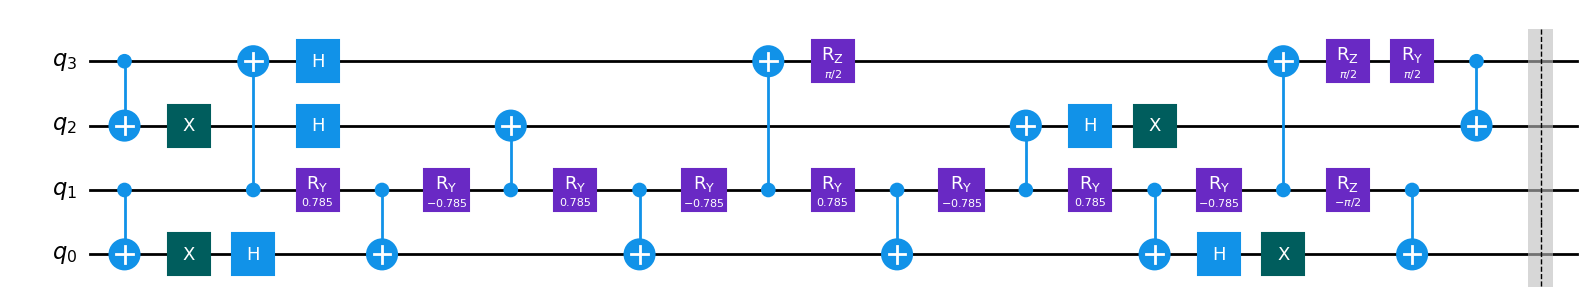

In [113]:
circuit = mvp_ceo_pool.get_circuit([2],[3.14])
circuit.draw()

In [48]:
ceo_pool = DVG_CEO(molecule)
ceo_pool.__dict__


for i in range(len(ceo_pool.operators)):
    print(f'\nOperator-{i}: {ceo_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(ceo_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-3: -0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-4: -0.25j [X0 X1 X2 Y3] +
0.25j [X0 Y1 X2 X3] +
-0.25j [Y0 X1 Y2 Y3] +
0.25j [Y0 Y1 Y2 X3]

Operator-5: -0.25j [X0 X1 Y2 X3] +
-0.25j [X0 Y1 Y2 Y3] +
0.25j [Y0 X1 X2 X3] +
0.25j [Y0 Y1 X2 Y3]


In [49]:
ceo_pool = DVE_CEO(molecule)
ceo_pool.__dict__


for i in range(len(ceo_pool.operators)):
    print(f'\nOperator-{i}: {ceo_pool.operators[i]._q_operator}')
    # print(f'\nOperator-{i}: {type(ceo_pool.operators[i]._f_operator)}')


Operator-0: 0.5j [X0 Y2] +
-0.5j [Y0 X2]

Operator-1: 0.5j [X1 Y3] +
-0.5j [Y1 X3]

Operator-2: -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-3: -0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]

Operator-4: -0.25j [X0 X1 X2 Y3] +
0.25j [X0 Y1 X2 X3] +
-0.25j [Y0 X1 Y2 Y3] +
0.25j [Y0 Y1 Y2 X3]

Operator-5: -0.25j [X0 X1 Y2 X3] +
-0.25j [X0 Y1 Y2 Y3] +
0.25j [Y0 X1 X2 X3] +
0.25j [Y0 Y1 X2 Y3]
